# Lab2: Data Preparation Example: Exploration, Partition and Regression


This lab material is largely self-contained. We assume that every student has already taken STAT7008 or knows some basic operations of Python. Noet that you may use Anaconda to run the .ipynb file. For the installation of Anaconda, please see https://conda.io/docs/user-guide/install/index.html.

### Purpose

In Lab 2, you will learn how to:

a. generate data. 

b. create summary statistics for exploratory data analysis.

C. create scatterplot matrix and correlation plot. 

d. do data partition.

e. do linear regression. 

### Useful libraries for this Lab

a. pandas, for data frame.

b. numpy, for data array. 

c. scipy, for data generating process (DGP)

d. matplotlib and seaborn, for plotting. 

e. sklearn, for linear model.

f. os, for the working directory. 

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os

wd = os.getcwd() # Set your working directory. 
print wd

/home/renjielu/PycharmProjects/DM8017/DM_Lab2


In Lab 2, we consider the following DGP: 

$$y=2+8x_1+0.8x_2+\epsilon$$

where $x_1$, $x_2$ and $\epsilon$ are independent standard normal distribution. We set the sample siez $n$ is equal to 712. Basic descriptive statistics are reported lelow.

In [11]:
mean_ = [0,0,0]
cov_ = [[1,0,0],[0,1,0],[0,0,1]]
n = 712

x1,x2,epsilon = np.random.multivariate_normal(mean_,cov_,n).T

y = 2+8*x1+0.8*x2+epsilon

print stats.describe(np.concatenate((y.reshape((n,1)), 
                                     x1.reshape((n,1)), 
                                     x2.reshape((n,1)), 
                                     epsilon.reshape((n,1))), axis=1))



DescribeResult(nobs=712, minmax=(array([-22.35528795,  -2.92147999,  -2.84768436,  -3.07409294]), array([ 24.19797444,   2.74392534,   4.37342726,   3.66800914])), mean=array([ 1.50767012, -0.06129439, -0.03824759,  0.02862332]), variance=array([ 67.4121349 ,   1.03850097,   0.98609185,   0.99527968]), skewness=array([ 0.02046774,  0.00265256,  0.01228941,  0.02650623]), kurtosis=array([-0.17584785, -0.16779398,  0.58125419,  0.15837123]))


Using the package seaborn to do a correlation plot of four variables: $y$, $x_1$, $x_2$ and $\epsilon$. 

           y        x1        x2         e
y   1.000000  0.988088  0.063147  0.105139
x1  0.988088  1.000000 -0.031665 -0.014746
x2  0.063147 -0.031665  1.000000 -0.017846
e   0.105139 -0.014746 -0.017846  1.000000


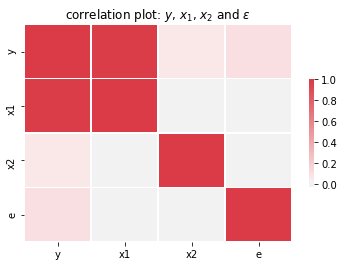

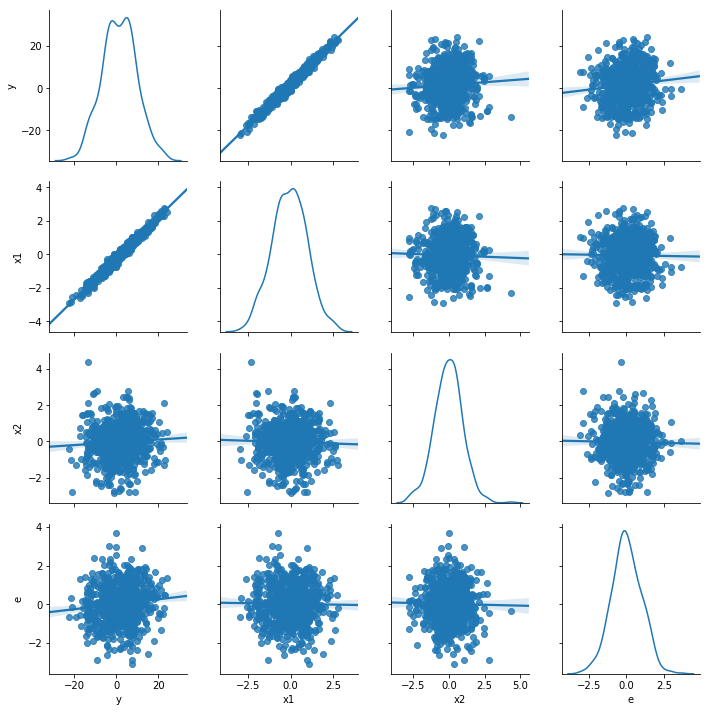

In [12]:
df = pd.DataFrame(np.concatenate((y.reshape((n,1)), 
                                     x1.reshape((n,1)), 
                                     x2.reshape((n,1)), 
                                     epsilon.reshape((n,1))), axis=1),
                                 columns=['y', 'x1', 'x2', 'e'])                

print df.corr() # Using DataFrame to compute correlation. 

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmax=1., center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('correlation plot: $y$, $x_1$, $x_2$ and $\epsilon$')

plt.show()

sns.pairplot(df,diag_kind="kde",kind="reg")

plt.show()

Before we build a linear model on the generated data, we divide it into two parts: one is for training and another one is for test. We consider to use half of data to train the model, and the remaining to do test. Note that according to DGP, it is safe to randomly partition the data with equal size.

In [13]:
train_ratio = 0.5
test_ratio = 1-train_ratio

from random import sample

train_indices = sample(range(n),int(n*train_ratio))
test_indices = [x for x in range(n) if x not in train_indices]

train_data = df.iloc[train_indices,:].values
test_data = df.iloc[test_indices,:].values

print stats.describe(train_data)

DescribeResult(nobs=356, minmax=(array([-22.35528795,  -2.92147999,  -2.8152419 ,  -2.86054284]), array([ 24.19797444,   2.74392534,   2.81220251,   3.66800914])), mean=array([ 1.54186338, -0.06073235, -0.03374697,  0.05471976]), variance=array([ 68.53366986,   1.05723963,   0.95608213,   0.91161558]), skewness=array([-0.00977759, -0.01006347, -0.04540179,  0.18270158]), kurtosis=array([-0.15952515, -0.22083147,  0.30812595,  0.40479172]))


Based on the previous data partition, we use the training data to fit the model, then test the effectiveness of model on the test data. The mean squared error (MSE) is considered to measure the performance of the fitted model. 

In [14]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(train_data[:,1:-1], train_data[:,0])

# make predictions using the testing set
y_pred = regr.predict(test_data[:,1:-1])

# the coefficients
print('Coefficients: ', regr.intercept_, regr.coef_[0], regr.coef_[1])
# the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_data[:,0], y_pred))


('Coefficients: ', 2.0559187345012999, 8.0246794207149357, 0.79111420358368023)
Mean squared error: 1.08
